<a href="https://colab.research.google.com/github/gmdeorozco/Diabetes-Regression-Algorithms-Comparison/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Analysis on Diabetes Dataset**

Welcome to the Jupyter notebook for Regression Analysis on the Diabetes dataset! In this notebook, we will explore the application of regression algorithms to predict the disease progression of diabetes patients based on various medical features.

### The Dataset

The Diabetes dataset contains ten baseline variables and one target variable, making it a perfect fit for regression analysis. The ten baseline variables include features such as age, gender, body mass index (BMI), blood pressure, and blood serum measurements. The target variable is a quantitative measure of disease progression one year after baseline. By leveraging regression techniques, we aim to build a model that can accurately predict the disease progression for new patients based on their medical attributes.

### The Objective

Our primary objective in this notebook is to:

1. Load and explore the Diabetes dataset to understand its structure and characteristics.
2. Perform data preprocessing, if necessary, to prepare the data for regression modeling.
3. Implement and train various regression algorithms, such as Linear Regression, Ridge Regression, Lasso Regression, or any other regression technique of interest.
4. Evaluate the performance of each regression model using appropriate metrics, such as Mean Squared Error (MSE) or R-squared.
5. Compare the results of different regression algorithms and select the most suitable model for predicting disease progression.

### Notebook Structure

The notebook is organized into different sections, each focusing on a specific aspect of regression analysis. We will guide you through the process step-by-step, providing explanations and code examples along the way. By the end of this notebook, you will have gained valuable insights into applying regression algorithms on real-world medical data.

### Let's Get Started!

It's time to dive into the world of regression analysis and explore how we can use machine learning techniques to predict diabetes disease progression. Let's load the dataset, preprocess the data, and begin our journey towards building accurate regression models!

Note: Before running any code cells, ensure that you have installed the necessary libraries, including scikit-learn and pandas, to work with regression models and manipulate data effectively.


#I. **Data Loading**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
data = load_diabetes()
X, y = data.data, data.target

# II. **Data Visualization**

##1. **Data Preprocessing**

Apply Standard Scaler to the features and convert into Pandas Dataframe for Data Visualization.

In [2]:
# Data preprocessing: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
# Convert X into a pandas DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)
X_scaled.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [4]:
# Convert y into a pandas DataFrame
y_df = pd.Series(y, name='Target')
y_df.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: Target, dtype: float64

In [13]:
df = pd.concat([X_scaled, y_df], axis=1)
df.head()
mesures = df.describe()
mesures

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02,442.000000
mean,-8.037814e-18,2.290777e-16,2.009453e-17,-1.607563e-17,8.037814e-18,4.018907e-18,-4.018907e-18,2.330966e-16,0.000000,-4.018907e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00,77.093005
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363050e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651040,-2.896390e+00,25.000000
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706500e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-0.698949,-6.975491e-01,87.000000
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192138e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-0.040937,-2.265729e-02,140.500000
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493678e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,0.681851,5.869224e-01,211.500000
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776058e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808722,2.851075e+00,346.000000


##2. **Looking for Correlations**

<Axes: >

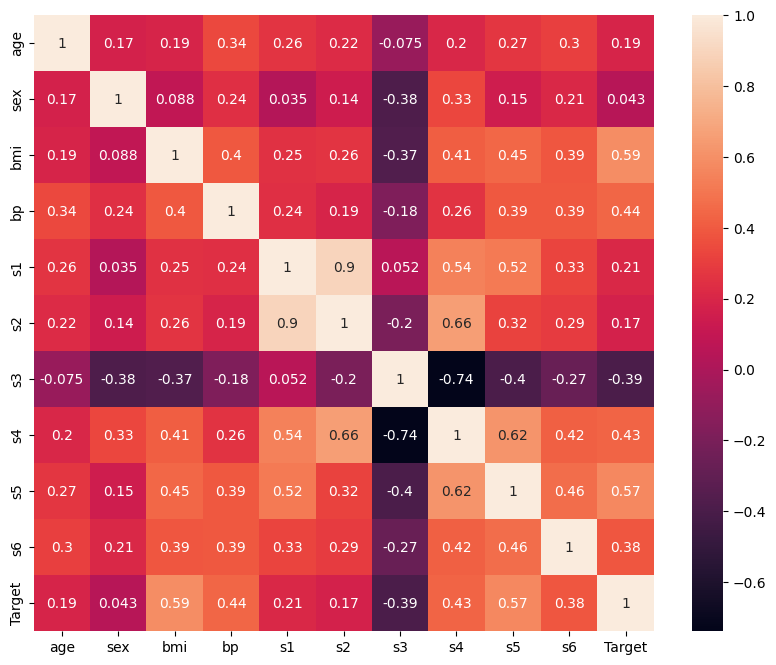

In [11]:
# Increase the size of the plot
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: Target, dtype: float64


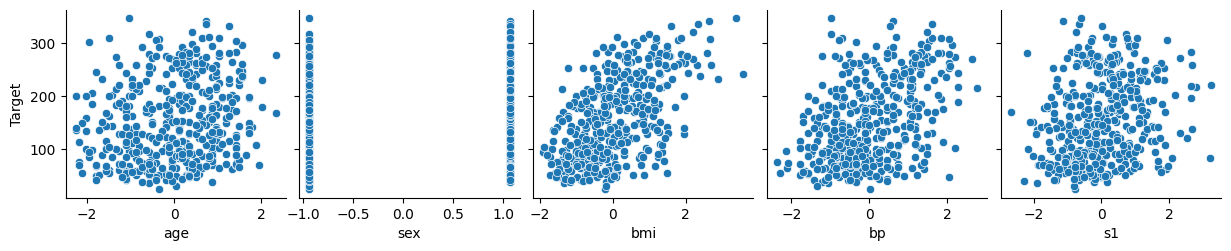

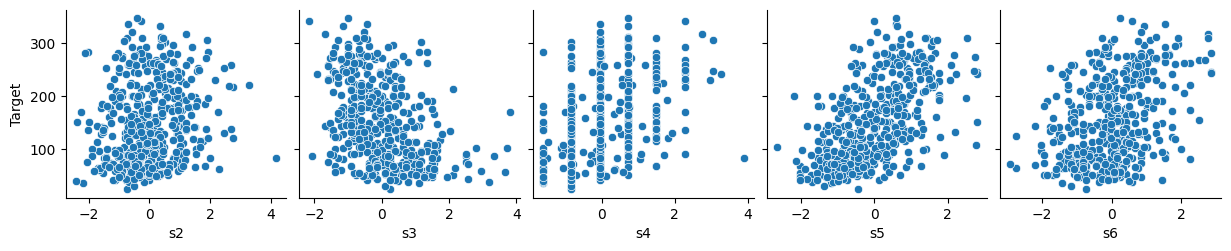

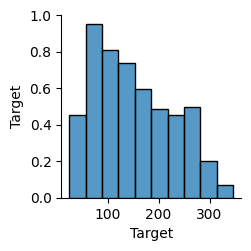

In [6]:
data_num = df.select_dtypes(include = ['float64', 'int64'])
data_corr = data_num.corr()['Target'][:-1]
top_features = data_corr[ abs(data_corr > 0)].sort_values(ascending=False)
print(top_features)

for d in range(0, len(data_num.columns), 5):
  sns.pairplot(data= data_num,
               x_vars= data_num.columns[d:d+5],
               y_vars=['Target'])


##3. **Correlation Summary**

- bmi (Body Mass Index) - Correlation: 0.586450
The BMI is a measure that indicates whether a person has a healthy body weight for their height. A positive correlation of 0.586 indicates that as the BMI increases, the 'Target' variable also tends to increase. This suggests that higher BMI values are associated with a higher value of the 'Target' variable, which may represent a diabetic-related outcome or a related health metric.

- s5 (Serum Triglycerides) - Correlation: 0.565883
Serum triglycerides are a type of fat found in the blood. A positive correlation of 0.565883 suggests that higher levels of serum triglycerides are associated with a higher value of the 'Target' variable. This could imply that higher triglyceride levels may be indicative of a higher risk or severity of the health condition represented by the 'Target' variable.

- bp (Blood Pressure) - Correlation: 0.441482
Blood pressure is a measure of the force exerted by the blood against the walls of the arteries. A positive correlation of 0.441482 indicates that higher blood pressure values are associated with a higher value of the 'Target' variable. This suggests that elevated blood pressure levels may be linked to the health condition represented by the 'Target' variable.

- s4 (Serum Total Cholesterol) - Correlation: 0.430453
Serum total cholesterol is a measure of the total amount of cholesterol in the blood. A positive correlation of 0.430453 suggests that higher levels of serum total cholesterol are associated with a higher value of the 'Target' variable. This may indicate that higher cholesterol levels could be related to the health condition represented by the 'Target' variable.

- s6 (Blood Sugar) - Correlation: 0.382483
Blood sugar levels, which could be represented by variables like fasting glucose, play a crucial role in diabetes management. A positive correlation of 0.382483 suggests that higher blood sugar levels are associated with a higher value of the 'Target' variable. This implies that elevated blood sugar levels may be connected to the health condition represented by the 'Target' variable.

- s1 (Lipoprotein Level) - Correlation: 0.212022
Lipoproteins are molecules that transport cholesterol and other fats in the bloodstream. A positive correlation of 0.212022 suggests that higher lipoprotein levels are associated with a higher value of the 'Target' variable. This may indicate that certain lipoprotein levels could be linked to the health condition represented by the 'Target' variable, though the correlation strength is relatively weaker compared to other features.

## 4. **Null Values**

In [21]:
total = df.isnull().sum().sort_values(ascending=False)
total_selected = total.head(20)
total_selected

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
Target    0
dtype: int64

##5. **Distribution and Log Transformation**

In the context of linear regression, it is generally desirable to have the target variable exhibit a roughly symmetric distribution (skewness close to zero). This is because linear regression assumes that the relationship between the dependent variable and independent variables is linear, and having a symmetric distribution helps fulfill this assumption.

0.44056293407014124


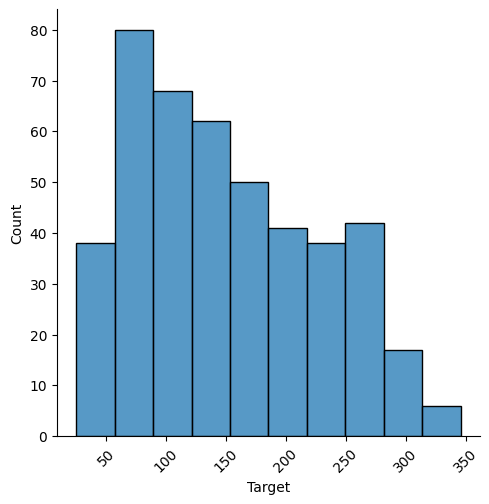

In [19]:
sns.displot(df,x ='Target')
plt.xticks(rotation=45)
plt.plot()

print(df['Target'].skew())

-0.3325670604728491


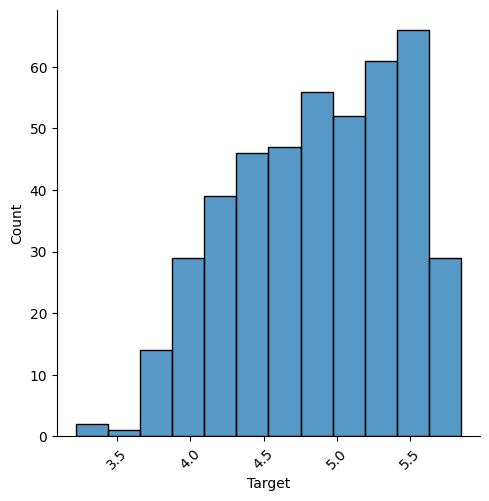

In [20]:
logged = np.log(df['Target'])
sns.displot(logged)
plt.xticks(rotation=45)
plt.plot()
print(logged.skew())


#III. **Train-Test Split**:

To evaluate the performance of our regression models, we split the dataset into training and testing subsets using `train_test_split`. The training set is used to train the regression model, while the testing set will assess its performance on unseen data.



In [7]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_df, test_size=0.2, random_state=42)

#A. **Linear Regression Model**:

We create a Linear Regression model using scikit-learn's `LinearRegression` class. The model is trained on the training data using the `fit` method.


In [15]:

# Create and train the linear regression model
Linear_Regression_Model = LinearRegression()
Linear_Regression_Model.fit(X_train, y_train)

LinearRegression()

- **Prediction and Evaluation**: With the trained Linear Regression model, we make predictions on the test set using the `predict` method. We then evaluate the model's performance using two common regression metrics: Mean Squared Error (MSE) and R-squared (R2).

In [16]:
# Make predictions on the test set
y_pred = Linear_Regression_Model.predict(X_test)

# Model evaluation
Linear_Regression_Model_MSE = mean_squared_error(y_test, y_pred)
Linear_Regression_Model_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:",  np.sqrt(Linear_Regression_Model_MSE))
print("R-squared:", Linear_Regression_Model_r2)


Mean Squared Error: 53.85344583676592
R-squared: 0.4526027629719196
